## Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [3]:
# 유방암 데이터 로딩
cancer = load_breast_cancer()

In [5]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
cancer.data[:5]  # 데이터

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [8]:
cancer.target[:5]  # 답

array([0, 0, 0, 0, 0])

 sklearn에 있는 데이터 셋 구조 : 딕셔너리
- cancer.data : 데이터
- cancer.target : 답
- cancer.feature_names : 데이터 컬럼명
- cancer.target_names : 답 이름

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [19]:
# 정규화(StandardScaler / MinMaxScaler)
scaler = StandardScaler()
# 데이터 표준화( 평균:0, 분산:1로 정규분포를 가진 값으로 변환)
# 피처 마다 값의 범위가 상이하므로 비교를 위해 비슷하게 변환하기
data_scaled = scaler.fit_transform(cancer.data)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, cancer.target, test_size=0.3, random_state=0
)

In [20]:
# 학습/예측(분류)
lr_clf = LogisticRegression()   # 디폴트 객체 생성
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
# 성능평가(정확도, AUC)
accu = accuracy_score(y_test, pred)   # 분류기 때문에 정확도 평가지표로 쓸수 있음(회귀는 쓸수 없음=> 오차(RMSE)로 판단)
roc_auc_ = roc_auc_score(y_test, pred)
print('정확도: {0:.4f}, AUC 점수:{1:.4f}'.format(accu,roc_auc_))


정확도: 0.9766, AUC 점수:0.9716


파라미터를 지정하지 않고, 디폴트 객체로 수행한 결과는 위와 같이 출력되었다.

In [21]:
# 파라미터 튜닝 (GridSearchCV)
from sklearn.model_selection import GridSearchCV

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Grid 로 돌릴 LogisticRegression 객체의 파라미터 설정
params = {
      'penalty':['l2','l1']   # 규제 종류 : 디폴트는 L2 규제
    , 'C':[0.01, 0.1, 1, 5, 10]   # C: 알파의 역수 => 즉 작아질수록 규제 강도가 커짐
}
# 적용할 Logistic Regression 객체 생성
lr_clf=LogisticRegression()

# grid 모델 객체 생성
grid_clf = GridSearchCV(
      estimator=lr_clf
    , param_grid=params
    , scoring='accuracy'
    , cv=3
)

# 학습
grid_clf.fit(data_scaled, cancer.target)

# 베스트 파라미터, 정확도 출력
b_param = grid_clf.best_params_
b_accu = grid_clf.best_score_
print('최적 하이퍼 파라미터 : {0}, 최적 정확도:{1:.4f}'.format(b_param, b_accu))

최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 정확도:0.9754


## Regression Tree

- 트리를 이용하여 회귀예측을 할수도 있다.
- 리프노드에 소속된 데이터값의 평균값을 이용

In [32]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [34]:
# 데이터 로딩
boston = load_boston()
# 데이터 프레임으로 만들기
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
# 답 데이터 프레임에 추가
boston_df['PRICE'] = boston.target

# 데이터프레임으로부터, 데이터, 답 생성
y_target = boston_df['PRICE']   # 시리즈 타입 답 반환
X_data = boston_df.drop(['PRICE'], axis=1, inplace = False)   # 데이터프레임 타입 데이터 반환

In [35]:
type(y_target), type(X_data)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [36]:
# 모델 생성(랜덤포레스트 회귀모델)
rf_reg = RandomForestRegressor(
      n_estimators=1000
    , random_state=0
)
# 교차 검증
neg_mse_scores = cross_val_score(
    rf_reg
    , X_data, y_target, scoring='neg_mean_squared_error'
    , cv= 5
)

# 결과 처리
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 결과 출력
print('5 교차 검증의 개별 RMSE :', np.round(rmse_scores, 2))
print('평균 RMSE : ', np.round(avg_rmse, 2))

5 교차 검증의 개별 RMSE : [2.81 3.63 4.54 6.8  4.34]
평균 RMSE :  4.42


In [42]:
# DT, GB, XGB, LGBM 각각 적용하여 성능 비교
# DT가 없었다면, n_estimators 를 파라미터로 추가할수도 있었다.(DT 는 앙상블이 아니라 1개의 트리이므로, n_esti 파라미터 X)
def get_model_cv_prediction(model, X_data_p, y_target_p):
    # cross_val_score,를 이용하여 평균 RMSE를 출력
    # 교차 검증
    neg_mse_scores = cross_val_score(model, X_data_p, y_target_p, scoring='neg_mean_squared_error', cv= 5)

    # 결과 처리
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    # 결과 출력
    print('#####', model.__class__.__name__, '#####')
    print('AVG RMSE : ', np.round(avg_rmse, 3))
    #return 없음, 실행하고 끝

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
# 5개 모델의 객체 생성
dt_reg = DecisionTreeRegressor(max_depth=4, random_state=0)
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=0)
gb_reg = GradientBoostingRegressor(n_estimators=1000, random_state=0)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 교차 검증 처리

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, X_data, y_target)


##### DecisionTreeRegressor #####
AVG RMSE :  5.978
##### RandomForestRegressor #####
AVG RMSE :  4.423
##### GradientBoostingRegressor #####
AVG RMSE :  4.269
[12:45:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
AVG RMSE :  4.089
##### LGBMRegressor #####
AVG RMSE :  4.646


XGBoost 가 가장 성능이 좋다. 그러나 속도가 떨어질수 있다

### 시각화

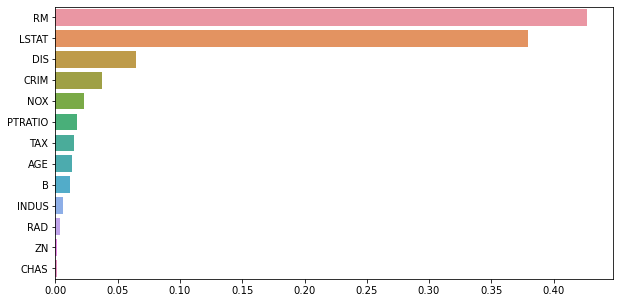

In [51]:
# 피처(컬럼) 중요도, 시각화
import seaborn as sns

# 학습 -> 중요도 추출
rf_reg= RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)
# 시리즈 형태로 중요도를 저장하고, 중요도 높은 순서로 sort(Series.sort_values 사용)
feature_ser = pd.Series(data=rf_reg.feature_importances_
                        , index=X_data.columns #
                       )
feature_ser_desc = feature_ser.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10,5))
sns.barplot(feature_ser_desc, feature_ser_desc.index)


 RM(거주할수 있는 방 개수),LSTAT(하위 계층의 비율) 가 확연하게 피처 중요도가 높다.
#### 즉 주택 가격에 영향을 가장 크게 미치는 컬럼은  RM 임을 확인할 수 있다.

Sample shape: (100, 2)


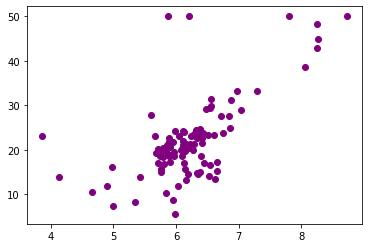

In [59]:
# RM feature 100개 추출 -> 산점도(분포확인)

boston_df_sample = boston_df[['RM','PRICE']]  # RM 값에 따른 답인 Price 확인
boston_df_sample = boston_df_sample.sample(
      n=100  # random 하게 추출할 데이터개수, 100개를 추출해보겠다(총 505개?중에서)
    , random_state=0
)

print('Sample shape:', boston_df_sample.shape)
# 산점도(분포확인)
plt.figure()
plt.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='purple')

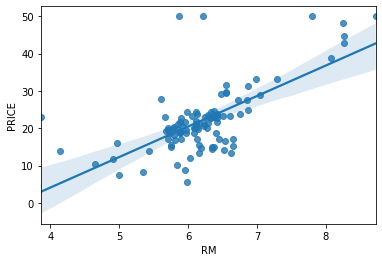

In [61]:
sns.regplot(boston_df_sample.RM, boston_df_sample.PRICE)

In [79]:
# RM feature: Data, Price = label
# LinearRegression, DT(max_depth=2, max_depth=7) 회귀모델 시각화
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 모델 객체 생성
lr_reg = LinearRegression()
dt_reg_depth_2 = DecisionTreeRegressor(max_depth=2)
dt_reg_depth_7 = DecisionTreeRegressor(max_depth=7)

In [80]:
# Test data 생성
# X_test = np.linspace(4.5, 8.5, 100)으로 해도되지만, 여기서는 arange를 썼음
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)  # 100개의 테스트 데이터를 임의로 생성후 2차원으로 변환

In [65]:
(8.5-4.5)/100

0.04

In [81]:
# Train Data, Label 추출 -> 2차원으로 변환 (reshape 할수있도록, ndarray 로 변환해주어야 함=> values) => 학습에 사용할 데이터
X_train = boston_df_sample['RM'].values.reshape(-1,1)
y_train = boston_df_sample['PRICE'].values.reshape(-1,1)

In [84]:
# 학습
lr_reg.fit(X_train,y_train)
dt_reg_depth_2.fit(X_train, y_train)
dt_reg_depth_7.fit(X_train, y_train)

# 예측 추출
lr_pred = lr_reg.predict(X_test)
dt2_pred = dt_reg_depth_2.predict(X_test)
dt7_pred = dt_reg_depth_7.predict(X_test)


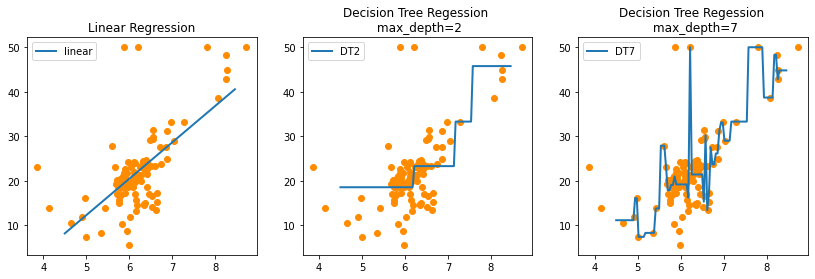

In [114]:
# 시각화
# 3 개 차트 구성 :subplots 으로 생성하면, 각 축에대해 튜플 형태로 반환해줌. 여기에 변수 지정해서 변수명을 통해 제어할수있음
fig, (ax1,ax2,ax3) = plt.subplots(
      figsize=(14,4)
    , nrows=1
    , ncols=3
)

# LInearRegression 첫번째 축(ax1)에 적용
# dt2 두번째 축(ax2)에 적용, dt7 세번째 축(ax3)에 적용
# 1. 산점도(원래 데이터 분포) : 이건 모든 모델에 대해서 동일하니 그대로 붙여준다.
ax1.set_title("Linear Regression")
ax1.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')

ax2.set_title("Decision Tree Regession \n max_depth=2")
ax2.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')

ax3.set_title("Decision Tree Regession \n max_depth=7")
ax3.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')

# 2. 회귀선 표시
ax1.plot(X_test, lr_pred, lw=2, label='linear')

ax2.plot(X_test, dt2_pred, lw=2, label='DT2')

ax3.plot(X_test, dt7_pred, lw=2, label='DT7')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()